# Очистка данных

Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. 
Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

Цель очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты.

Цели модуля:

Рассмотреть методы определения пропусков в данных и основные методики работы с ними.

Познакомиться с методами поиска выбросов в данных и рассмотреть основные практики работы с ними.

Научиться определять дубликаты и неинформативные признаки в данных и избавляться от них.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). 
В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.

In [2]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


Давайте проведём небольшой разведывательный анализ, чтобы понять, с чем мы работаем ↓

In [4]:
display(sber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

None

In [7]:
# Посмотрим сколько уникальных значений в каждом атрибуте
unique_list = []
for col in sber_data.columns:
    item = (col, sber_data[col].nunique(),sber_data[col].dtypes) 
    unique_list.append(item) 
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts.head(30))

,Column_Name,Num_Unique,Type
0,mosque_count_1000,2,int64
1,big_road1_1line,2,object
2,nuclear_reactor_raion,2,object
3,railroad_terminal_raion,2,object
4,oil_chemistry_raion,2,object
5,school_education_centers_top_20_raion,3,int64
6,university_top_20_raion,4,int64
7,ecology,5,object
8,culture_objects_top_25_raion,6,int64
9,healthcare_centers_raion,7,int64


In [8]:
display(sber_data.describe())

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,mosque_count_1000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,23783.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,3271.272464,4.065111,8324.970739,4.705031,0.109678,1190.738677,...,1.505808,2.010973,1.328488,1.345235,2.330047,0.972014,9.638074,7.063236,0.019166,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,2169.759592,2.993795,4289.734174,3.445105,0.333328,1057.015001,...,2.253759,2.306446,1.526219,3.053600,2.986937,0.748876,7.112284,5.702807,0.137110,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1012.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004072,0.000000,0.026788,0.007903,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,1874.000000,2.000000,5782.000000,2.000000,0.000000,520.000000,...,0.483758,0.555231,0.474842,0.285124,0.860469,0.532480,4.225254,2.879357,0.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,2854.000000,4.000000,7377.000000,5.000000,0.000000,990.000000,...,0.839647,1.052999,0.899034,0.493048,1.490794,0.860037,8.612007,5.643495,0.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,4050.000000,6.000000,9891.000000,7.000000,0.000000,1786.000000,...,1.549517,3.046687,1.571062,0.936324,2.922264,1.248480,13.459593,10.328587,0.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,11926.000000,13.000000,24750.000000,14.000000,2.000000,4849.000000,...,26.259543,18.958933,24.268209,47.394706,45.669060,15.615728,87.600690,59.203148,1.000000,1.111111e+08


In [12]:
fig = px.box(
    data_frame=sber_data, #датафрейм
    y="ecology", #ось x
    x="price_doc", #ось y
    color='ecology', #расцветка в зависимости от страны
    orientation='h', #ориентация графика
    height=300, #высота
    width=600, #ширина
    title='Зависимость' #заголовок
)
fig.show()

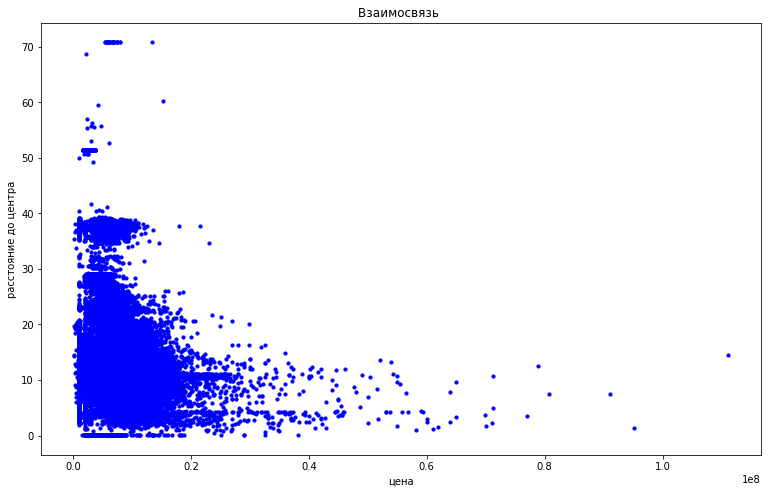

In [17]:
# matplotlib
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=sber_data['price_doc'], 
    y=sber_data['kremlin_km'], 
    s=10,
    marker='o',
    c = 'blue'
);
axes.set_ylabel('расстояние до центра')
axes.set_xlabel('цена')
axes.set_title('Взаимосвязь ')
plt.show()

## 3. Работа с пропусками: как их обнаружить?

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»). 

Найти пропуски - В библиотеке pandas специально для этого реализован метод isnull(). 
Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False. 
True ставится на месте, где ранее находилось значение NaN.

In [18]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ

Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.

True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк. 

Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [19]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. 
Например, уже сейчас ясно, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации при прогнозировании.
 А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.

## СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ


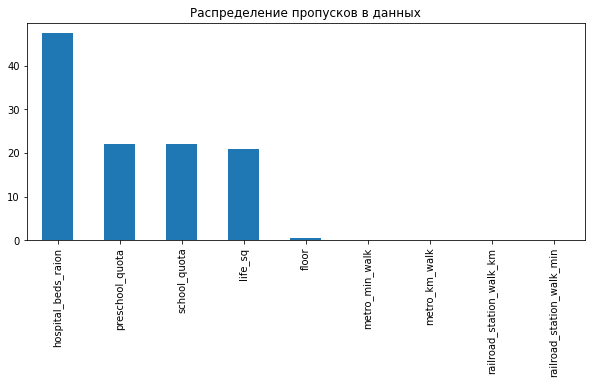

In [20]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

## ТЕПЛОВАЯ КАРТА ПРОПУСКОВ

Её часто используют, когда столбцов с пропусками не так много (меньше 10). 
Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице.


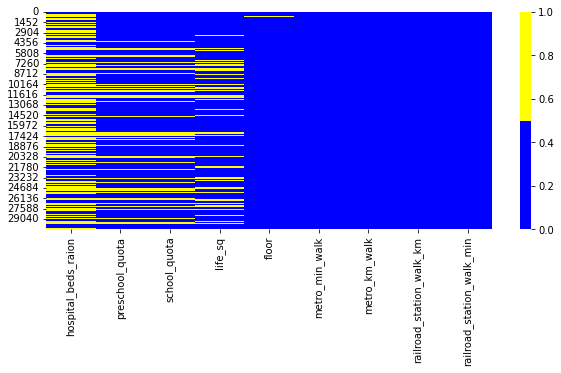

In [21]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

## МЕТОДЫ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
### ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ

Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил: 
удаляйте столбец, если число пропусков в нем более 30-40 %. В остальных случаях лучше удалять записи.

метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 

Основные параметры метода:

* axis — ось, по которой производится удаление (по умолчанию 0 — строки).
* how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 
* thresh — порог удаления. 
Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. 
Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем n-2, где  n— число признаков (если axis=0).

__Примечание: Начиная с версии 1.5.0 Pandas запрещает одновременно устанавливать параметры how и thresh.__

Предварительно создадим копию исходной таблицы — drop_data, чтобы не повредить её. 
Зададимся порогом в 70 %: будем оставлять только те столбцы, в которых 70 и более процентов записей не являются пустыми . 
После этого удалим записи, в которых содержится хотя бы один пропуск.
 Наконец, выведем информацию о числе пропусков и наслаждаемся нулями. 

In [22]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [23]:
#Посмотрим на результирующее число записей:

print(drop_data.shape)

(20888, 60)


Итак, мы удалили один столбец и ⅓ всех записей для того, чтобы избавиться от пропусков. Не слишком ли это много и что с этим можно сделать?

## ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ

Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков. 

Важным фактором при выборе метода является распределение признаков с пропусками. Давайте выведем их на экран. 

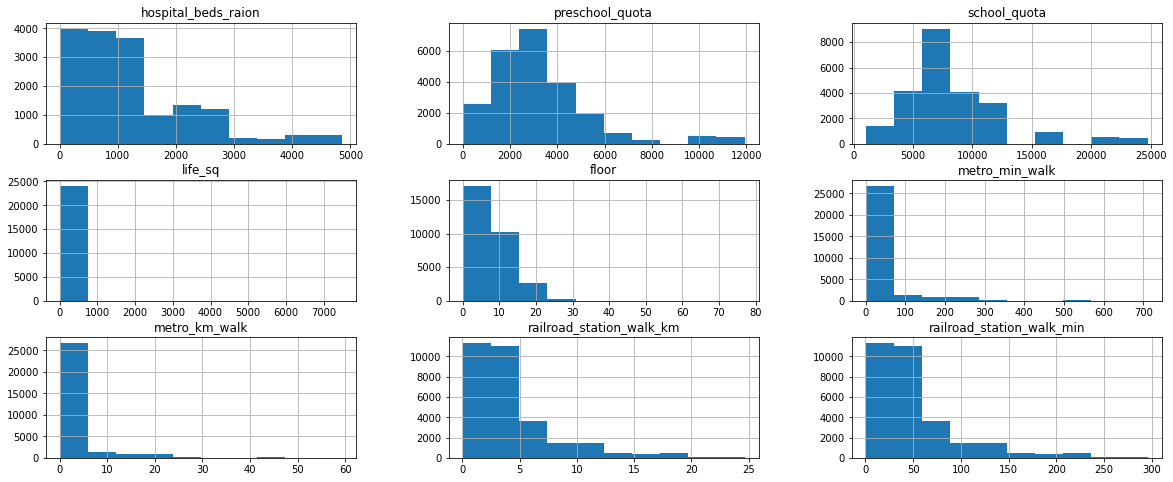

In [24]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

рассмотрим несколько рекомендаций.

* Для распределений, похожих на логнормальное, где пик близ нуля, 
а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). 
Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. 
Поэтому предпочтительнее использовать медианное значение для таких признаков.
* Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным,
 так как может получиться число, которое не может являться значением этого признака. 
 Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. 
 Поэтому такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.
* Категориальные признаки заполняются либо модальным значением, 
либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. 
* Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. 
Например, в наших данных есть признак full_sq (общая площадь квартиры).
 Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!

метод fillna(). 
Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). 
Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, 
где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

In [25]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

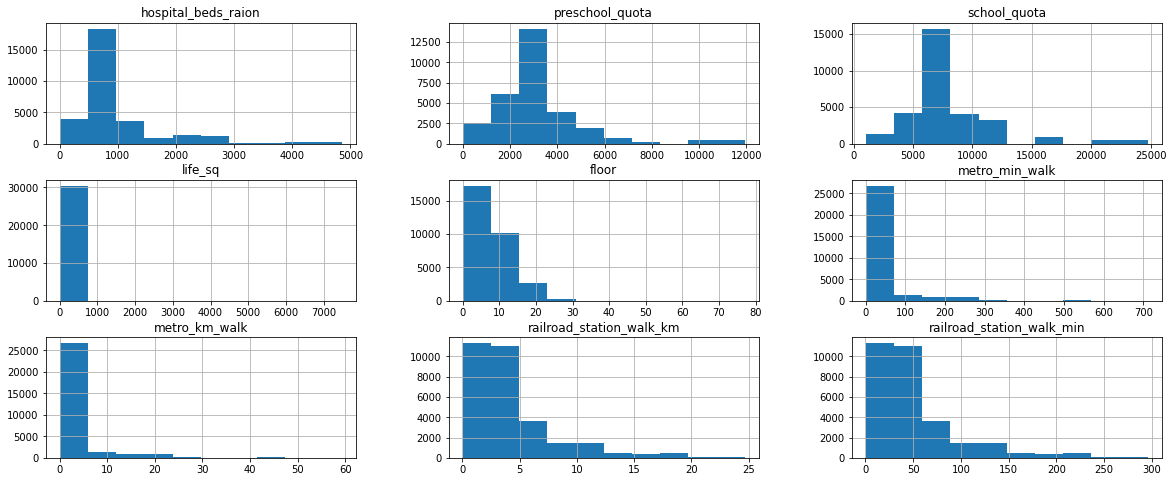

In [26]:
# Посмотрим, на то, как изменились распределения наших признаков:

cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

Обратите внимание на то, как сильно изменилось распределение для признака hospital_beds_raion. 
Это связано с тем, что мы заполнили модальным значением почти 47 % общих данных. 
В результате мы кардинально исказили исходное распределение признака, что может плохо сказаться на модели.

## ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

In [27]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

Метод исходит из предположения, что, если дать модели информацию о том, что в ячейке ранее была пустота, 
то она будет меньше доверять таким записям и меньше учитывать её в процессе обучения. 
Иногда такие фишки действительно работают, иногда не дают эффекта, 
а иногда и вовсе могут ухудшить результат обучения и затруднить процесс обучения.

Проклятие размерности гласит, что, увеличивая размерность функции, 
мы повышаем сложность поиска этого минимума и рискуем вовсе не найти его!
 Об этом страшном проклятии мы ещё будем говорить в курсе по ML и даже попробуем его победить. Но об этом чуть позже.

Однако, несмотря на свои недостатки, этот метод кажется наиболее логичным из предложенных ранее и часто используется в очистке данных.

## КОМБИНИРОВАНИЕ МЕТОДОВ

Например, мы можем:

* удалить столбцы, в которых более 30 % пропусков;
* удалить записи, в которых более двух пропусков одновременно;
* заполнить оставшиеся ячейки константами.

In [28]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [32]:
print(combine_data.shape)


(26800, 60)


## РЕЗЮМЕ ПО МЕТОДАМ РАБОТЫ С ПРОПУСКАМИ

Итак, мы рассмотрели основные методы решения проблемы с недостающей информацией, а также их недостатки. 

Ещё раз хотим подчеркнуть, что выбор метода или комбинации методов является исключительно вашим решением. 
Однако важно держать в голове несколько рекомендаций:

* Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него. 
Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», 
которыми вы закрываете пропуски, выглядели правдоподобно.
* Заполняйте данные с умом! Если перед вами количественный признак, 
то использование нецелого числа в качестве константы является как минимум нелогичным.
* Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. 
Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.
Если вам позволяют сроки вашего проекта, попробуйте несколько кардинально разных подходов работы с пропусками.

## ДРУГИЕ МЕТОДЫ ЗАПОЛНЕНИЯ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ

можно предсказать пропуски с помощью модели. 
Такой подход основывается на том, что вы считаете признак с отсутствующими значениями целевым, 
а остальные признаки — факторами и строите модель, предсказывающую пропуски в данных. 
На практике часто для заполнения «дыр» в данных используют метод ближайшего соседа (KNN) или линейную регрессию.

Ещё один подход — заполнение, основанное на группах. 
Можно сгруппировать данные по некоторым признакам и заполнять константой, полученной в группе. 
Например, в наших данных для признака жилой площади можно было бы заполнять пропуски средней площадью квартир в районе.

In [ ]:
#ЗАДАНИЕ 4.6

df = pd.read_csv('./Root/data/test_data.csv')
thresh = df.shape[0]*0.5
df = df.dropna(thresh=thresh, axis=1)
thresh2 = df.shape[1] - 2
df = df.dropna(thresh=thresh2, axis=0)
df = df.fillna({
    'one': df['one'].mean(),
    'two': df['two'].mean(),
    'four': df['four'].mode()[0]})